<a href="https://colab.research.google.com/github/AndreiAf02/Transfer_Learning_Extension/blob/main/Bank_Marketing_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [2]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/Transfer_Learning_Extension/main/'

In [3]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [4]:
# data_orig = pd.read_csv("Credit_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
# data_SRS = pd.read_csv("Credit_SRS_Fine_Tuning.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv("Credit_SRSwR_Fine_Tuning.csv", sep=",", header=0)
# data_Sy = pd.read_csv("Credit_Sy_Fine_Tuning.csv", sep=",", header=0)
# data_Sym = pd.read_csv("Credit_Sy_multi_Fine_Tuning.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv("Credit_SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv("Credit_Sy_ROS_Fine_Tuning.csv", sep=",", header=0)

data_orig = pd.read_csv(path_to_data+"Bank_Imbalanced_Fine_Tuning_Updated.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data+"Bank_SRS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data+"Bank_SRSwR_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data+"Bank_Sy_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data+"Bank_Sy_multi_Fine_Tuning.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data+"Bank_SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data+"Bank_Sy_ROS_Fine_Tuning.csv", sep=",", header=0)



# data_orig

Original (imbalanced) data performance:

In [5]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.000000,0.996540
1,1,0.000773,0.993080
2,2,0.000773,0.996540
3,3,0.006961,0.979239
4,4,0.001547,0.993080
5,5,0.003094,0.986159
6,6,0.000773,0.993080
7,7,0.002320,0.989619
8,8,0.003094,0.993080
9,9,0.005414,0.982699


Error type: FPR
Mean: 0.002258313998453176
Variance: 9.639577717453417e-06
Variance of estimate: 1.9279155434906833e-07
Standard error: 0.00043908035067521337
95% Confidence Interval:  [ 0.001397716511129758 ,  0.0031189114857765945 ]
-----------------------------
Error type: FNR
Mean: 0.9910034602076125
Variance: 7.037213419868225e-05
Variance of estimate: 1.4074426839736449e-06
Standard error: 0.0011863568956994538
95% Confidence Interval:  [ 0.9886782006920416 ,  0.9933287197231835 ]
-----------------------------


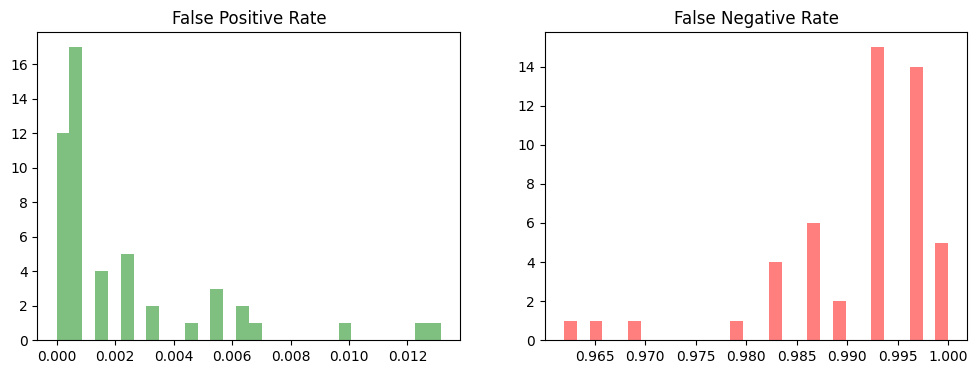

In [6]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

In [7]:
data_SRS

,Unnamed: 0,FPR,FNR
0,0,0.245940,0.370242
1,1,0.191802,0.525952
2,2,0.252900,0.352941
3,3,0.229698,0.411765
4,4,0.234339,0.397924
...,...,...,...
95,25,0.242846,0.370242
96,26,0.255994,0.352941
97,27,0.263728,0.335640
98,28,0.278422,0.304498


Error type: FPR
Mean: 0.23745552976571538
Variance: 0.0004089400175939574
Variance of estimate: 4.0894001759395735e-06
Standard error: 0.002022226539223431
95% Confidence Interval:  [ 0.23349196574883746 ,  0.2414190937825933 ]
-----------------------------
Error type: FNR
Mean: 0.3931833910166435
Variance: 0.0020829830609515763
Variance of estimate: 2.0829830609515765e-05
Standard error: 0.004563970925577393
95% Confidence Interval:  [ 0.38423800800251184 ,  0.4021287740307752 ]
-----------------------------


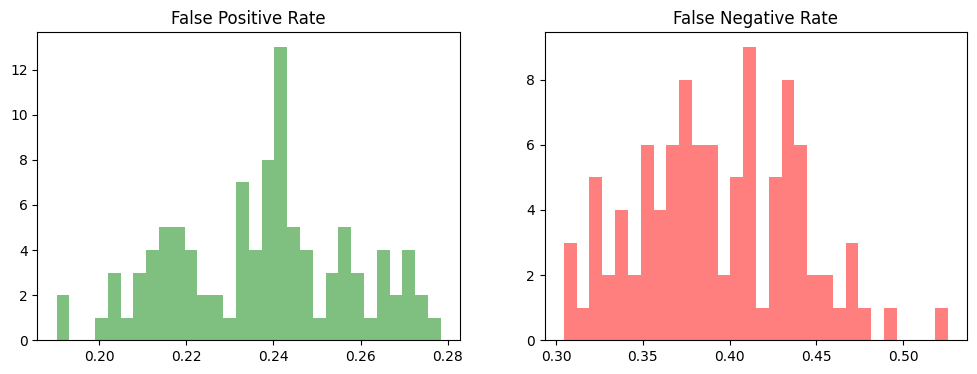

In [8]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

In [9]:
data_SRSwR

,Unnamed: 0,FPR,FNR
0,0,0.242073,0.408304
1,1,0.167827,0.529412
2,2,0.208043,0.474048
3,3,0.209590,0.474048
4,4,0.208817,0.474048
...,...,...,...
95,25,0.187935,0.453287
96,26,0.215777,0.408304
97,27,0.195669,0.432526
98,28,0.228925,0.370242


Error type: FPR
Mean: 0.19518174787124515
Variance: 0.001003880413245476
Variance of estimate: 1.003880413245476e-05
Standard error: 0.0031684071917060723
95% Confidence Interval:  [ 0.18897166977550126 ,  0.20139182596698904 ]
-----------------------------
Error type: FNR
Mean: 0.4791349480960554
Variance: 0.004908571348902947
Variance of estimate: 4.908571348902947e-05
Standard error: 0.007006119717006659
95% Confidence Interval:  [ 0.46540295345072236 ,  0.4928669427413884 ]
-----------------------------


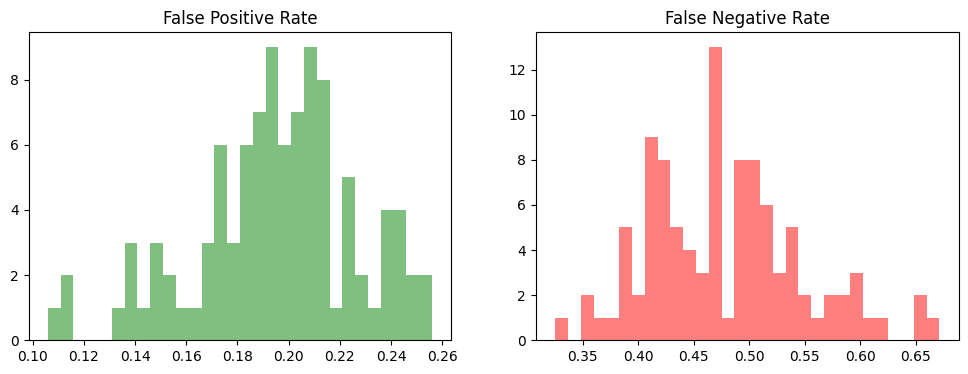

In [10]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

In [11]:
data_Sy

,Unnamed: 0,FPR,FNR
0,0,0.207270,0.411765
1,1,0.221964,0.377163
2,2,0.228152,0.366782
3,3,0.204176,0.418685
4,4,0.234339,0.359862
...,...,...,...
95,25,0.147718,0.595156
96,26,0.219644,0.477509
97,27,0.202630,0.491349
98,28,0.184068,0.505190


Error type: FPR
Mean: 0.21040216550690638
Variance: 0.0008805272395667921
Variance of estimate: 8.805272395667921e-06
Standard error: 0.002967367923879329
95% Confidence Interval:  [ 0.2045861243761029 ,  0.21621820663770985 ]
-----------------------------
Error type: FNR
Mean: 0.4476470588292042
Variance: 0.004153713714920866
Variance of estimate: 4.153713714920866e-05
Standard error: 0.006444931120594592
95% Confidence Interval:  [ 0.4350149938328388 ,  0.46027912382556957 ]
-----------------------------


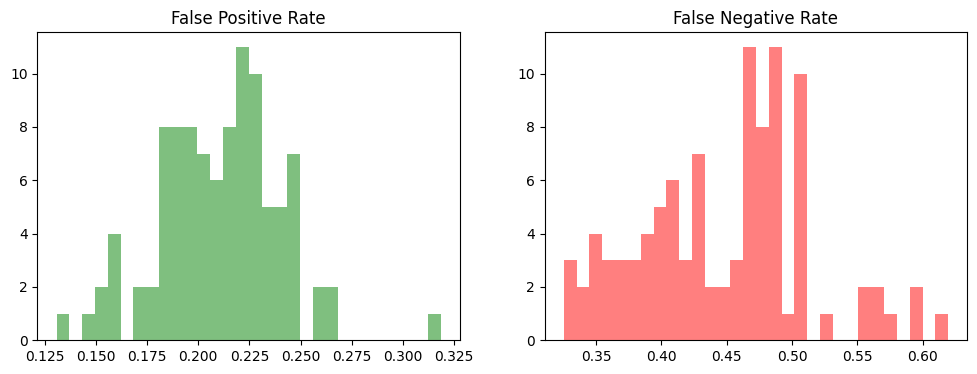

In [12]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.10250580046403708
Variance: 0.0018414955232078929
Variance of estimate: 3.682991046415786e-05
Standard error: 0.006068765151507995
95% Confidence Interval:  [ 0.09061102076708141 ,  0.11440058016099275 ]
-----------------------------
Error type: FNR
Mean: 0.7591003460207613
Variance: 0.0062000244836383596
Variance of estimate: 0.00012400048967276718
Standard error: 0.01113555071259465
95% Confidence Interval:  [ 0.7372746666240757 ,  0.7809260254174468 ]
-----------------------------


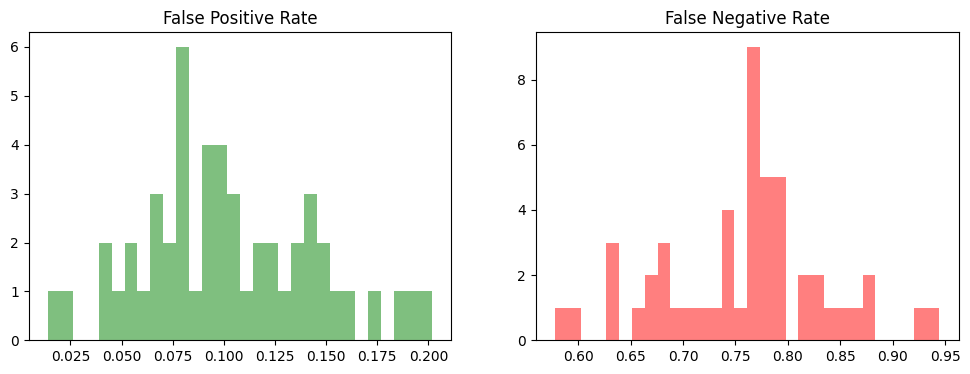

In [13]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.16403712296983752
Variance: 0.000462112088264587
Variance of estimate: 9.24224176529174e-06
Standard error: 0.0030401055516695043
95% Confidence Interval:  [ 0.1580785160885653 ,  0.16999572985110975 ]
-----------------------------
Error type: FNR
Mean: 0.5211764705882352
Variance: 0.0027664507691943065
Variance of estimate: 5.532901538388613e-05
Standard error: 0.007438347624565965
95% Confidence Interval:  [ 0.506597309244086 ,  0.5357556319323845 ]
-----------------------------


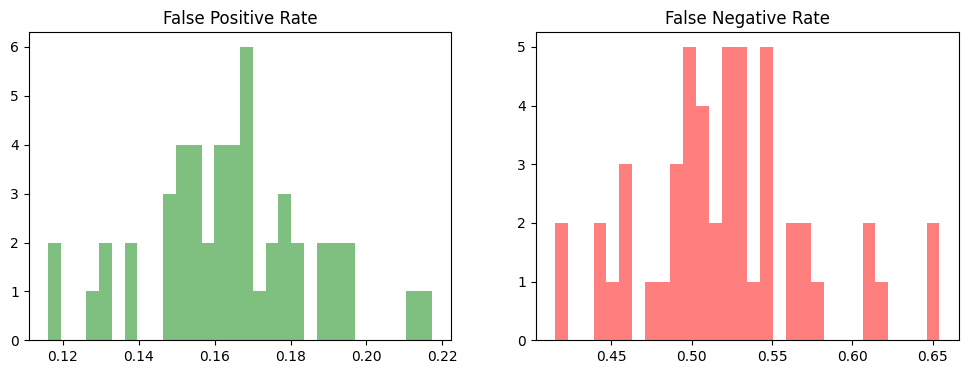

In [14]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.1788553750966744
Variance: 0.0014382904734793144
Variance of estimate: 2.8765809469586287e-05
Standard error: 0.005363376685408763
95% Confidence Interval:  [ 0.16834315679327322 ,  0.18936759340007558 ]
-----------------------------
Error type: FNR
Mean: 0.5105190311418685
Variance: 0.006275439954121279
Variance of estimate: 0.0001255087990824256
Standard error: 0.01120307096658883
95% Confidence Interval:  [ 0.48856101204735436 ,  0.5324770502363826 ]
-----------------------------


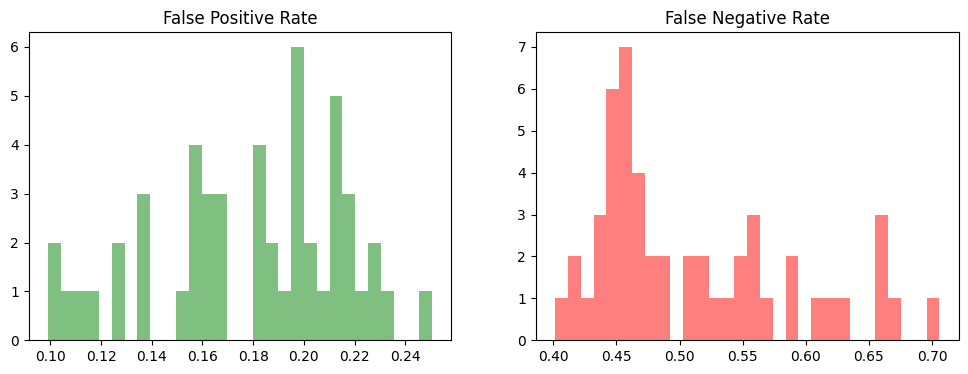

In [15]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [16]:
FPR = pd.DataFrame()

DF = FPR

DF['Orig'] = orig_FPR
DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

<Axes: title={'center': 'FPR'}>

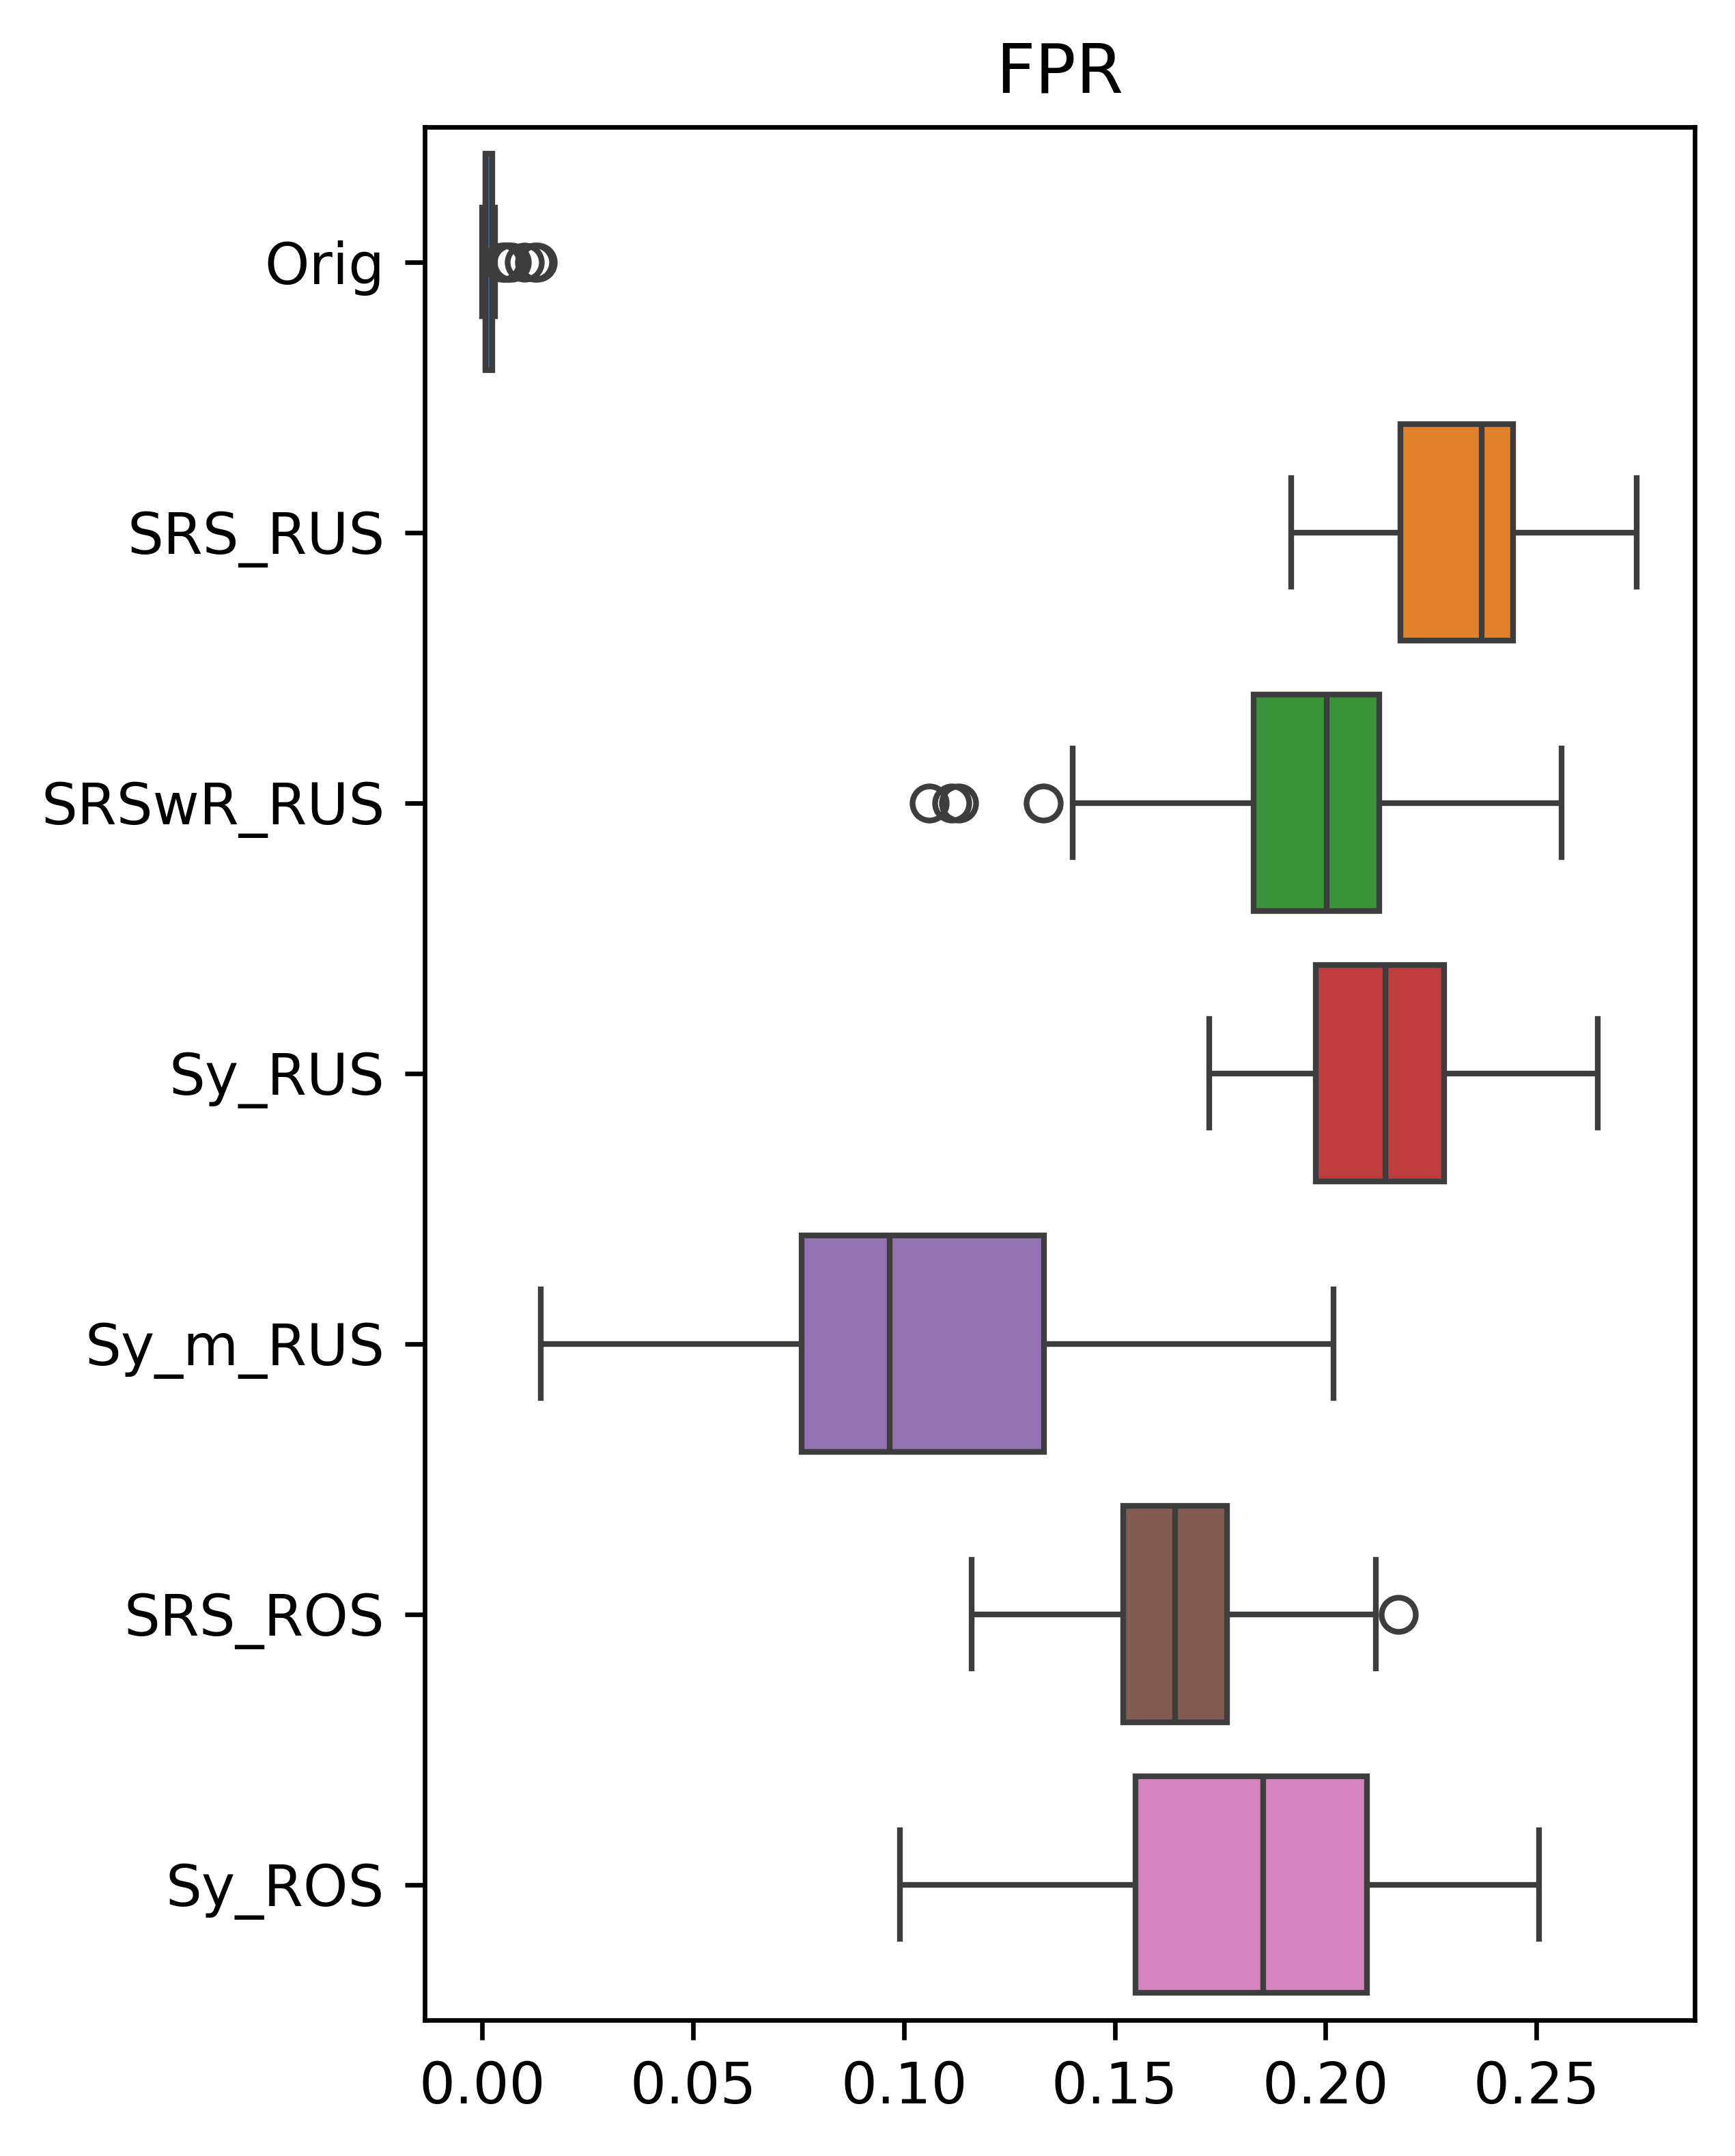

In [17]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [18]:
FNR = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_FNR
DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR

<Axes: title={'center': 'FNR'}>

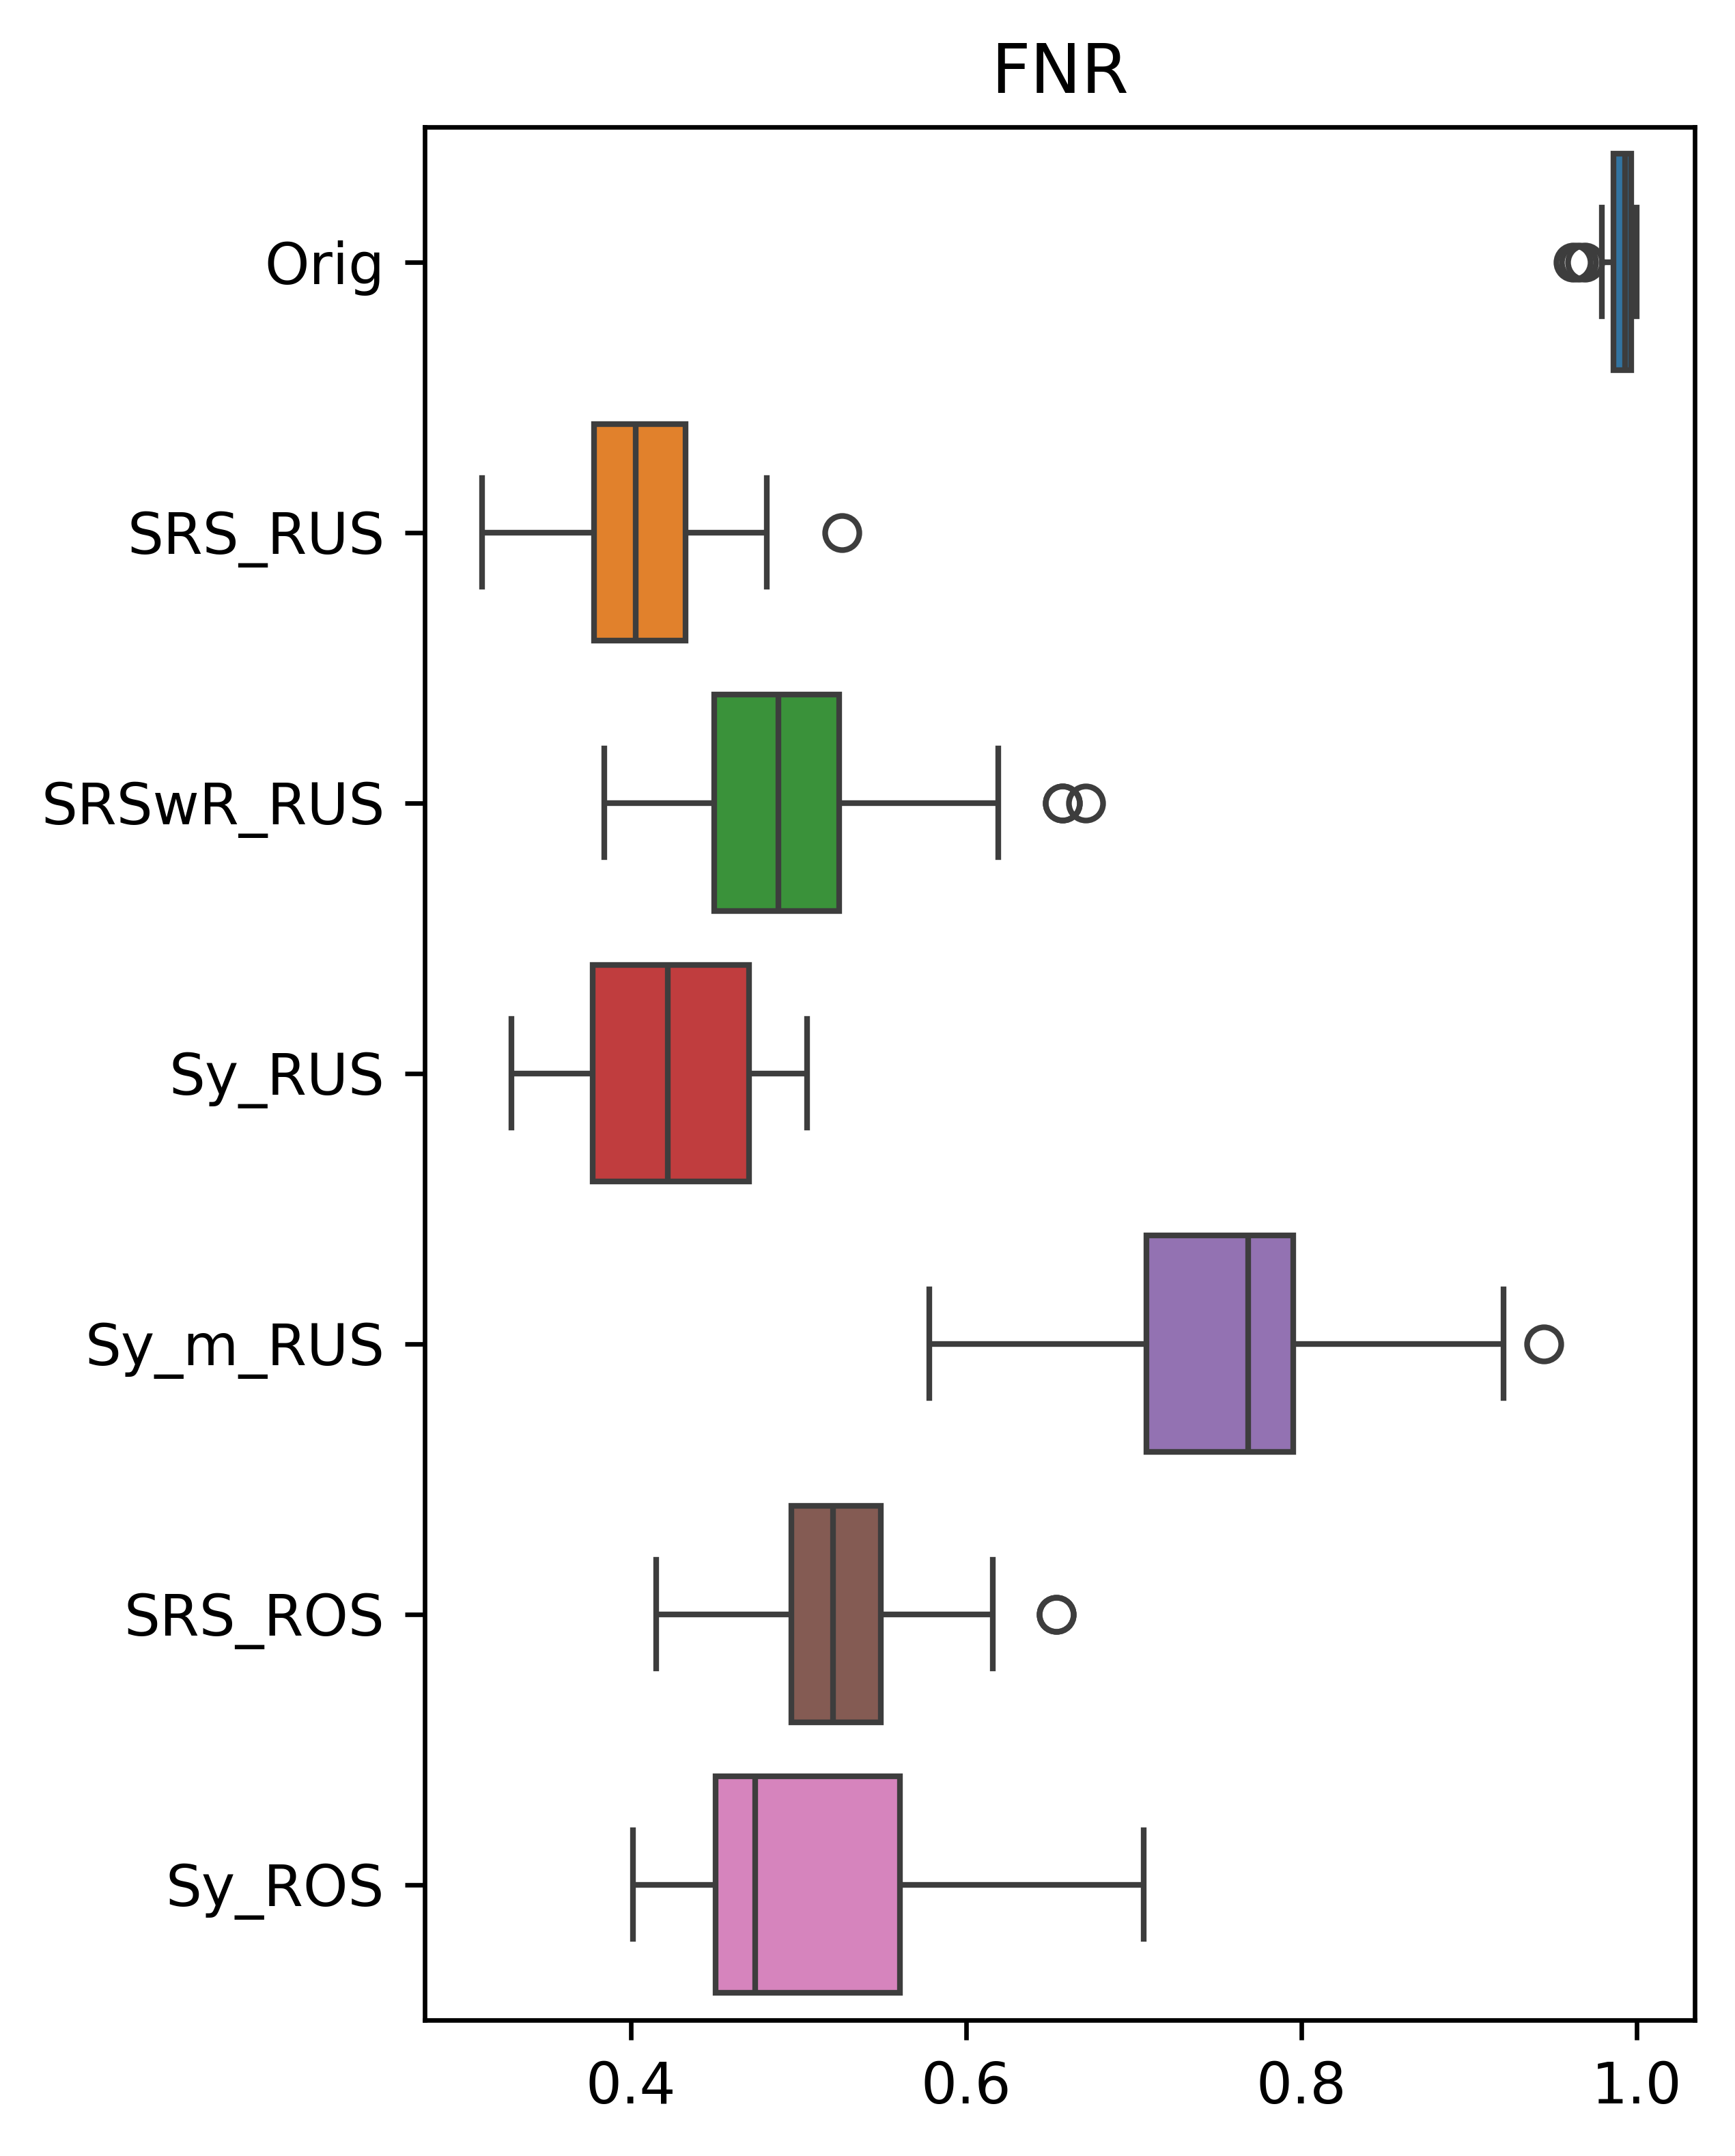

In [19]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [20]:
# data_orig = pd.read_csv(path_to_data + "Imbalanced_Extended.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data + "SRS_RUS_Extended.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data + "SRSwR_RUS_Extended.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data + "Sy_RUS_Extended.csv", sep=",", header=0)
# data_Sy2 = pd.read_csv(path_to_data + "Sy2_RUS_Extended.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data + "SRS_ROS_Extended.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data + "Sy_ROS_Extended.csv", sep=",", header=0)

data_orig = pd.read_csv(path_to_data+"Bank_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data+"Bank_SRS_RUS.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data+"Bank_SRSwR_RUS.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data+"Bank_Sy_RUS.csv", sep=",", header=0)
data_Sy2 = pd.read_csv(path_to_data+"Bank_Sy2_RUS.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data+"Bank_SRS_ROS.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data+"Bank_Sy_ROS.csv", sep=",", header=0)

data_SRS

,Unnamed: 0,Source time,FPR,TPR,FNR,TNR,Target time
0,0,12.596636,0.098841,0.748299,0.251701,0.901159,0.764573
1,1,14.243331,0.104314,0.780612,0.219388,0.895686,0.984185
2,2,10.008150,0.131681,0.824830,0.175170,0.868319,0.772737
3,3,12.337391,0.174984,0.858844,0.141156,0.825016,0.789927
4,4,11.148867,0.120412,0.802721,0.197279,0.879588,0.767323
5,5,10.102469,0.144881,0.829932,0.170068,0.855119,0.789148
6,6,9.872483,0.105280,0.787415,0.212585,0.894720,0.785075
7,7,9.609812,0.154057,0.863946,0.136054,0.845943,1.042168
8,8,10.674996,0.129910,0.819728,0.180272,0.870090,1.046870
9,9,9.746573,0.138764,0.836735,0.163265,0.861236,0.781416


Original (imbalanced) dataset:

In [21]:
print('SRS RUS', len(data_SRS))
print('SRSwR RUS', len(data_SRSwR))
print('Sy RUS', len(data_Sy))
print('Sym RUS', len(data_Sy2))
print('SRS ROS', len(data_SRS_ROS))
print('Sy ROS', len(data_Sy_ROS))



SRS RUS 50
SRSwR RUS 50
Sy RUS 50
Sym RUS 50
SRS ROS 50
Sy ROS 50


In [23]:
orig_FPR = data_orig['FPR']
orig_FNR = data_orig['FNR']
orig_time = data_orig['Source time']


Error type: FPR
Mean: 0.02256922086284606
Variance: 4.0373200771533656e-05
Variance of estimate: 8.074640154306732e-07
Standard error: 0.0008985900152075323
95% Confidence Interval:  [ 0.020807984433039297 ,  0.024330457292652822 ]
-----------------------------
Error type: FNR
Mean: 0.6790476190476191
Variance: 0.005121170222913545
Variance of estimate: 0.00010242340445827089
Standard error: 0.010120444874523593
95% Confidence Interval:  [ 0.6592115470935529 ,  0.6988836910016853 ]
-----------------------------
Error type: Source time
Mean: 37.25087096371997
Variance: 46.34164482833837
Variance of estimate: 0.9268328965667674
Standard error: 0.9627216090681497
95% Confidence Interval:  [ 35.36393660994639 ,  39.137805317493545 ]
-----------------------------


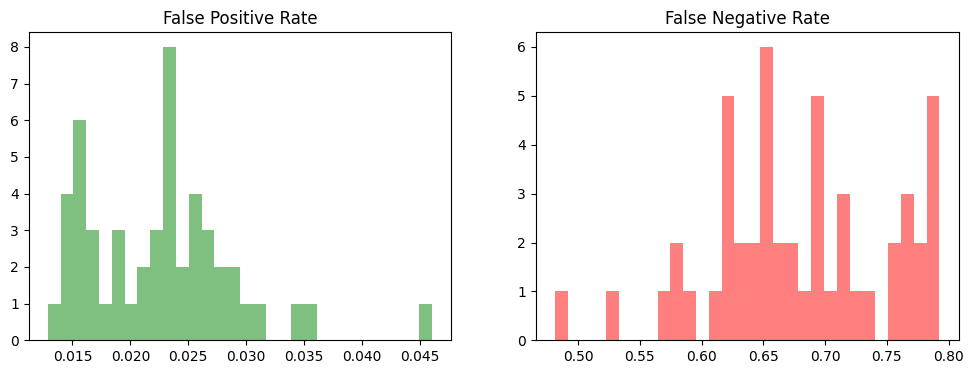

In [24]:
data = data_orig

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

Error type: FPR
Mean: 0.13233741146168704
Variance: 0.000699945474918772
Variance of estimate: 1.3998909498375438e-05
Standard error: 0.00374151165952686
95% Confidence Interval:  [ 0.1250040486090144 ,  0.13967077431435967 ]
-----------------------------
Error type: FNR
Mean: 0.1837414965986394
Variance: 0.0018337219658097871
Variance of estimate: 3.667443931619574e-05
Standard error: 0.0060559424795976835
95% Confidence Interval:  [ 0.17187184933862792 ,  0.19561114385865086 ]
-----------------------------
Error type: Source time
Mean: 12.871834510459957
Variance: 2.792197838366416
Variance of estimate: 0.05584395676732832
Standard error: 0.23631325982121343
95% Confidence Interval:  [ 12.408660521210379 ,  13.335008499709534 ]
-----------------------------


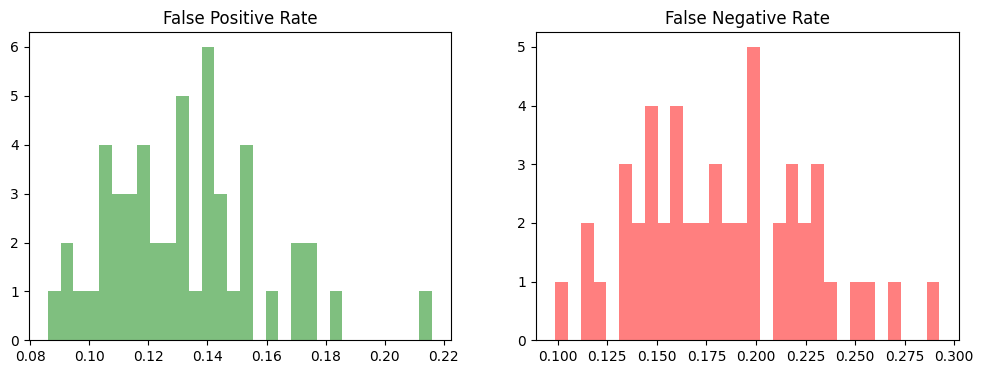

In [25]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.1278428847392144
Variance: 0.00105318984840924
Variance of estimate: 2.10637969681848e-05
Standard error: 0.0045895312362140865
95% Confidence Interval:  [ 0.1188474035162348 ,  0.136838365962194 ]
-----------------------------
Error type: FNR
Mean: 0.19744897959183672
Variance: 0.003180393704059438
Variance of estimate: 6.360787408118877e-05
Standard error: 0.007975454474899142
95% Confidence Interval:  [ 0.1818170888210344 ,  0.21308087036263904 ]
-----------------------------
Error type: Source time
Mean: 12.892521737859933
Variance: 2.8920124908560902
Variance of estimate: 0.057840249817121804
Standard error: 0.24049999961979585
95% Confidence Interval:  [ 12.421141738605133 ,  13.363901737114734 ]
-----------------------------


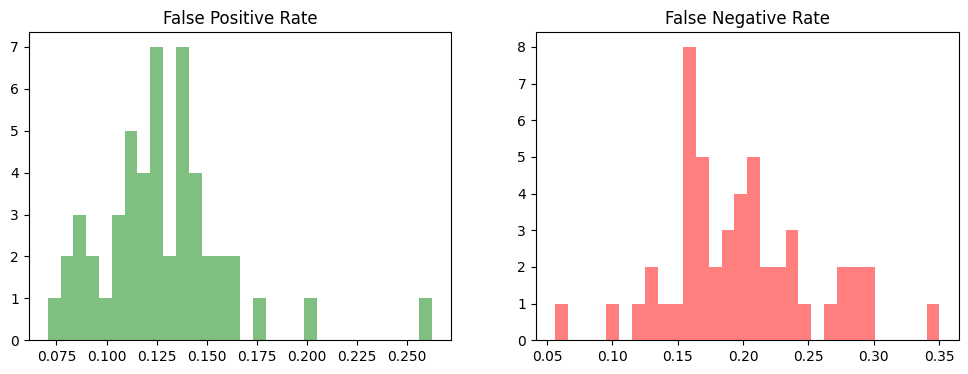

In [26]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.12907276239536378
Variance: 0.0007046800022010747
Variance of estimate: 1.4093600044021493e-05
Standard error: 0.003754144382415452
95% Confidence Interval:  [ 0.1217146394058295 ,  0.13643088538489806 ]
-----------------------------
Error type: FNR
Mean: 0.19336734693877544
Variance: 0.0024412600664311256
Variance of estimate: 4.882520132862251e-05
Standard error: 0.006987503225660973
95% Confidence Interval:  [ 0.17967184061647992 ,  0.20706285326107096 ]
-----------------------------
Error type: Source time
Mean: 12.79409699446007
Variance: 4.485783800253851
Variance of estimate: 0.08971567600507703
Standard error: 0.2995257518229059
95% Confidence Interval:  [ 12.207026520887174 ,  13.381167468032965 ]
-----------------------------


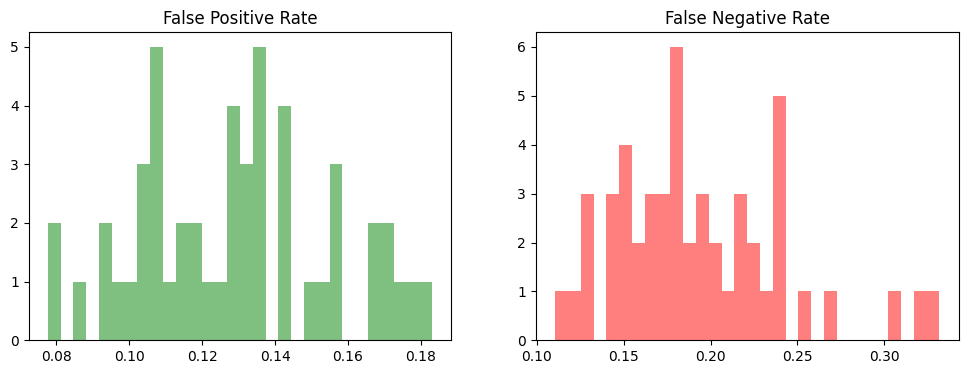

In [27]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

In [28]:
data_Sy2

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,9.697337,0.132003,0.867997,0.212585,0.787415,0.764860
1,1,8.793765,0.126529,0.873471,0.195578,0.804422,1.023217
2,2,8.692254,0.106729,0.893271,0.250000,0.750000,1.070577
3,3,10.768860,0.113812,0.886188,0.207483,0.792517,0.761734
4,4,9.837659,0.133773,0.866227,0.171769,0.828231,0.775658
5,5,9.566466,0.124759,0.875241,0.214286,0.785714,1.047728
6,6,10.006104,0.099485,0.900515,0.255102,0.744898,0.766891
7,7,9.978140,0.105602,0.894398,0.236395,0.763605,1.038076
8,8,10.240593,0.118319,0.881681,0.232993,0.767007,0.772186
9,9,9.032491,0.134900,0.865100,0.200680,0.799320,1.138521


Error type: FPR
Mean: 0.1267514488087572
Variance: 0.0007559941499919598
Variance of estimate: 1.5119882999839195e-05
Standard error: 0.0038884293744183133
95% Confidence Interval:  [ 0.1191301272348973 ,  0.13437277038261708 ]
-----------------------------
Error type: FNR
Mean: 0.2052721088435374
Variance: 0.0023105747227392965
Variance of estimate: 4.621149445478593e-05
Standard error: 0.006797903680899423
95% Confidence Interval:  [ 0.19194821762897452 ,  0.21859600005810026 ]
-----------------------------
Error type: Source time
Mean: 12.419814865759909
Variance: 4.044919670729796
Variance of estimate: 0.08089839341459593
Standard error: 0.28442642882579655
95% Confidence Interval:  [ 11.862339065261347 ,  12.97729066625847 ]
-----------------------------


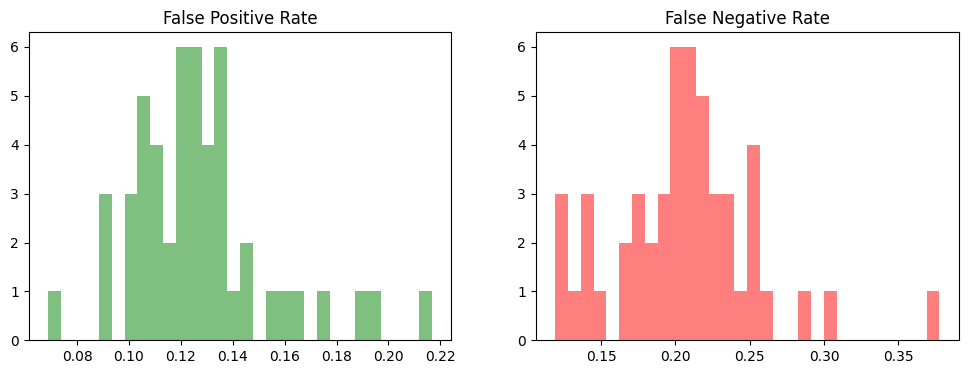

In [29]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.14755312298776557
Variance: 0.0005485075344537089
Variance of estimate: 1.0970150689074178e-05
Standard error: 0.0033121217805319567
95% Confidence Interval:  [ 0.14106136429792293 ,  0.15404488167760821 ]
-----------------------------
Error type: FNR
Mean: 0.13312925170068024
Variance: 0.0012921014581037198
Variance of estimate: 2.5842029162074395e-05
Standard error: 0.005083505597722343
95% Confidence Interval:  [ 0.12316558072914445 ,  0.14309292267221604 ]
-----------------------------
Error type: Source time
Mean: 62.46242834995992
Variance: 188.47009359835312
Variance of estimate: 3.7694018719670623
Standard error: 1.941494751980304
95% Confidence Interval:  [ 58.65709863607852 ,  66.26775806384131 ]
-----------------------------


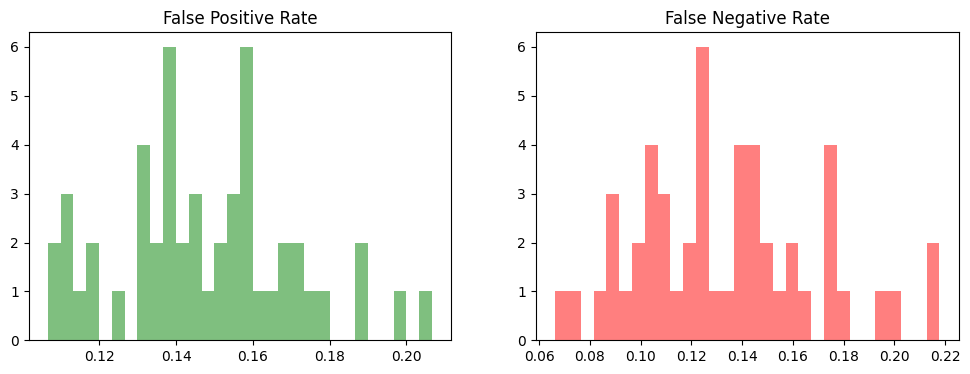

In [30]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

In [31]:
data_Sy_ROS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,50.025062,0.192531,0.807469,0.091837,0.908163,0.784797
1,1,50.876569,0.169672,0.830328,0.095238,0.904762,2.514232
2,2,55.105255,0.124115,0.875885,0.164966,0.835034,0.802183
3,3,48.945116,0.159208,0.840792,0.122449,0.877551,0.802815
4,4,44.156225,0.154057,0.845943,0.132653,0.867347,1.077493
5,5,47.169476,0.166613,0.833387,0.090136,0.909864,0.799817
6,6,50.905640,0.149549,0.850451,0.096939,0.903061,0.806244
7,7,58.505166,0.133451,0.866549,0.149660,0.850340,0.798201
8,8,46.168284,0.138925,0.861075,0.125850,0.874150,1.259662
9,9,47.922635,0.115100,0.884900,0.139456,0.860544,1.227315


Error type: FPR
Mean: 0.14799098518995488
Variance: 0.0005655298997726671
Variance of estimate: 1.1310597995453343e-05
Standard error: 0.0033631232501134035
95% Confidence Interval:  [ 0.1413992636197326 ,  0.15458270676017716 ]
-----------------------------
Error type: FNR
Mean: 0.13098639455782307
Variance: 0.001276807613229938
Variance of estimate: 2.553615226459876e-05
Standard error: 0.005053330808941639
95% Confidence Interval:  [ 0.12108186617229746 ,  0.14089092294334868 ]
-----------------------------
Error type: Source time
Mean: 65.78849734123978
Variance: 188.6123910298122
Variance of estimate: 3.7722478205962435
Standard error: 1.942227540891191
95% Confidence Interval:  [ 61.98173136109304 ,  69.59526332138651 ]
-----------------------------


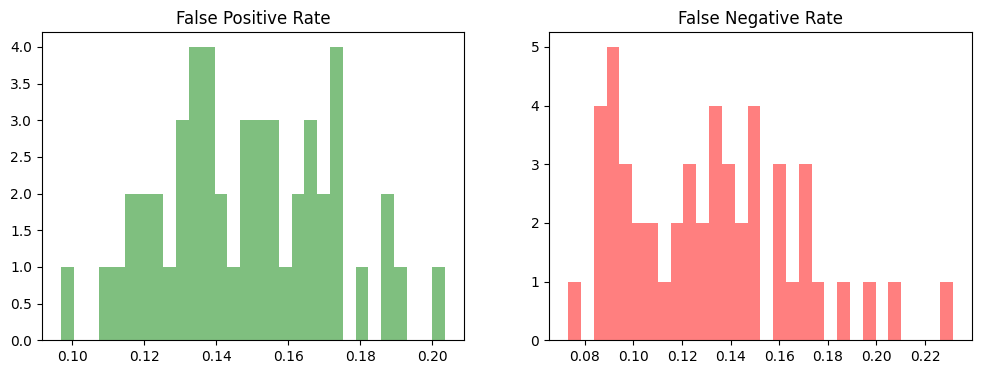

In [32]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [33]:
FPR = pd.DataFrame()

DF = FPR

DF['Orig'] = orig_FPR
DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

<Axes: title={'center': 'FPR'}>

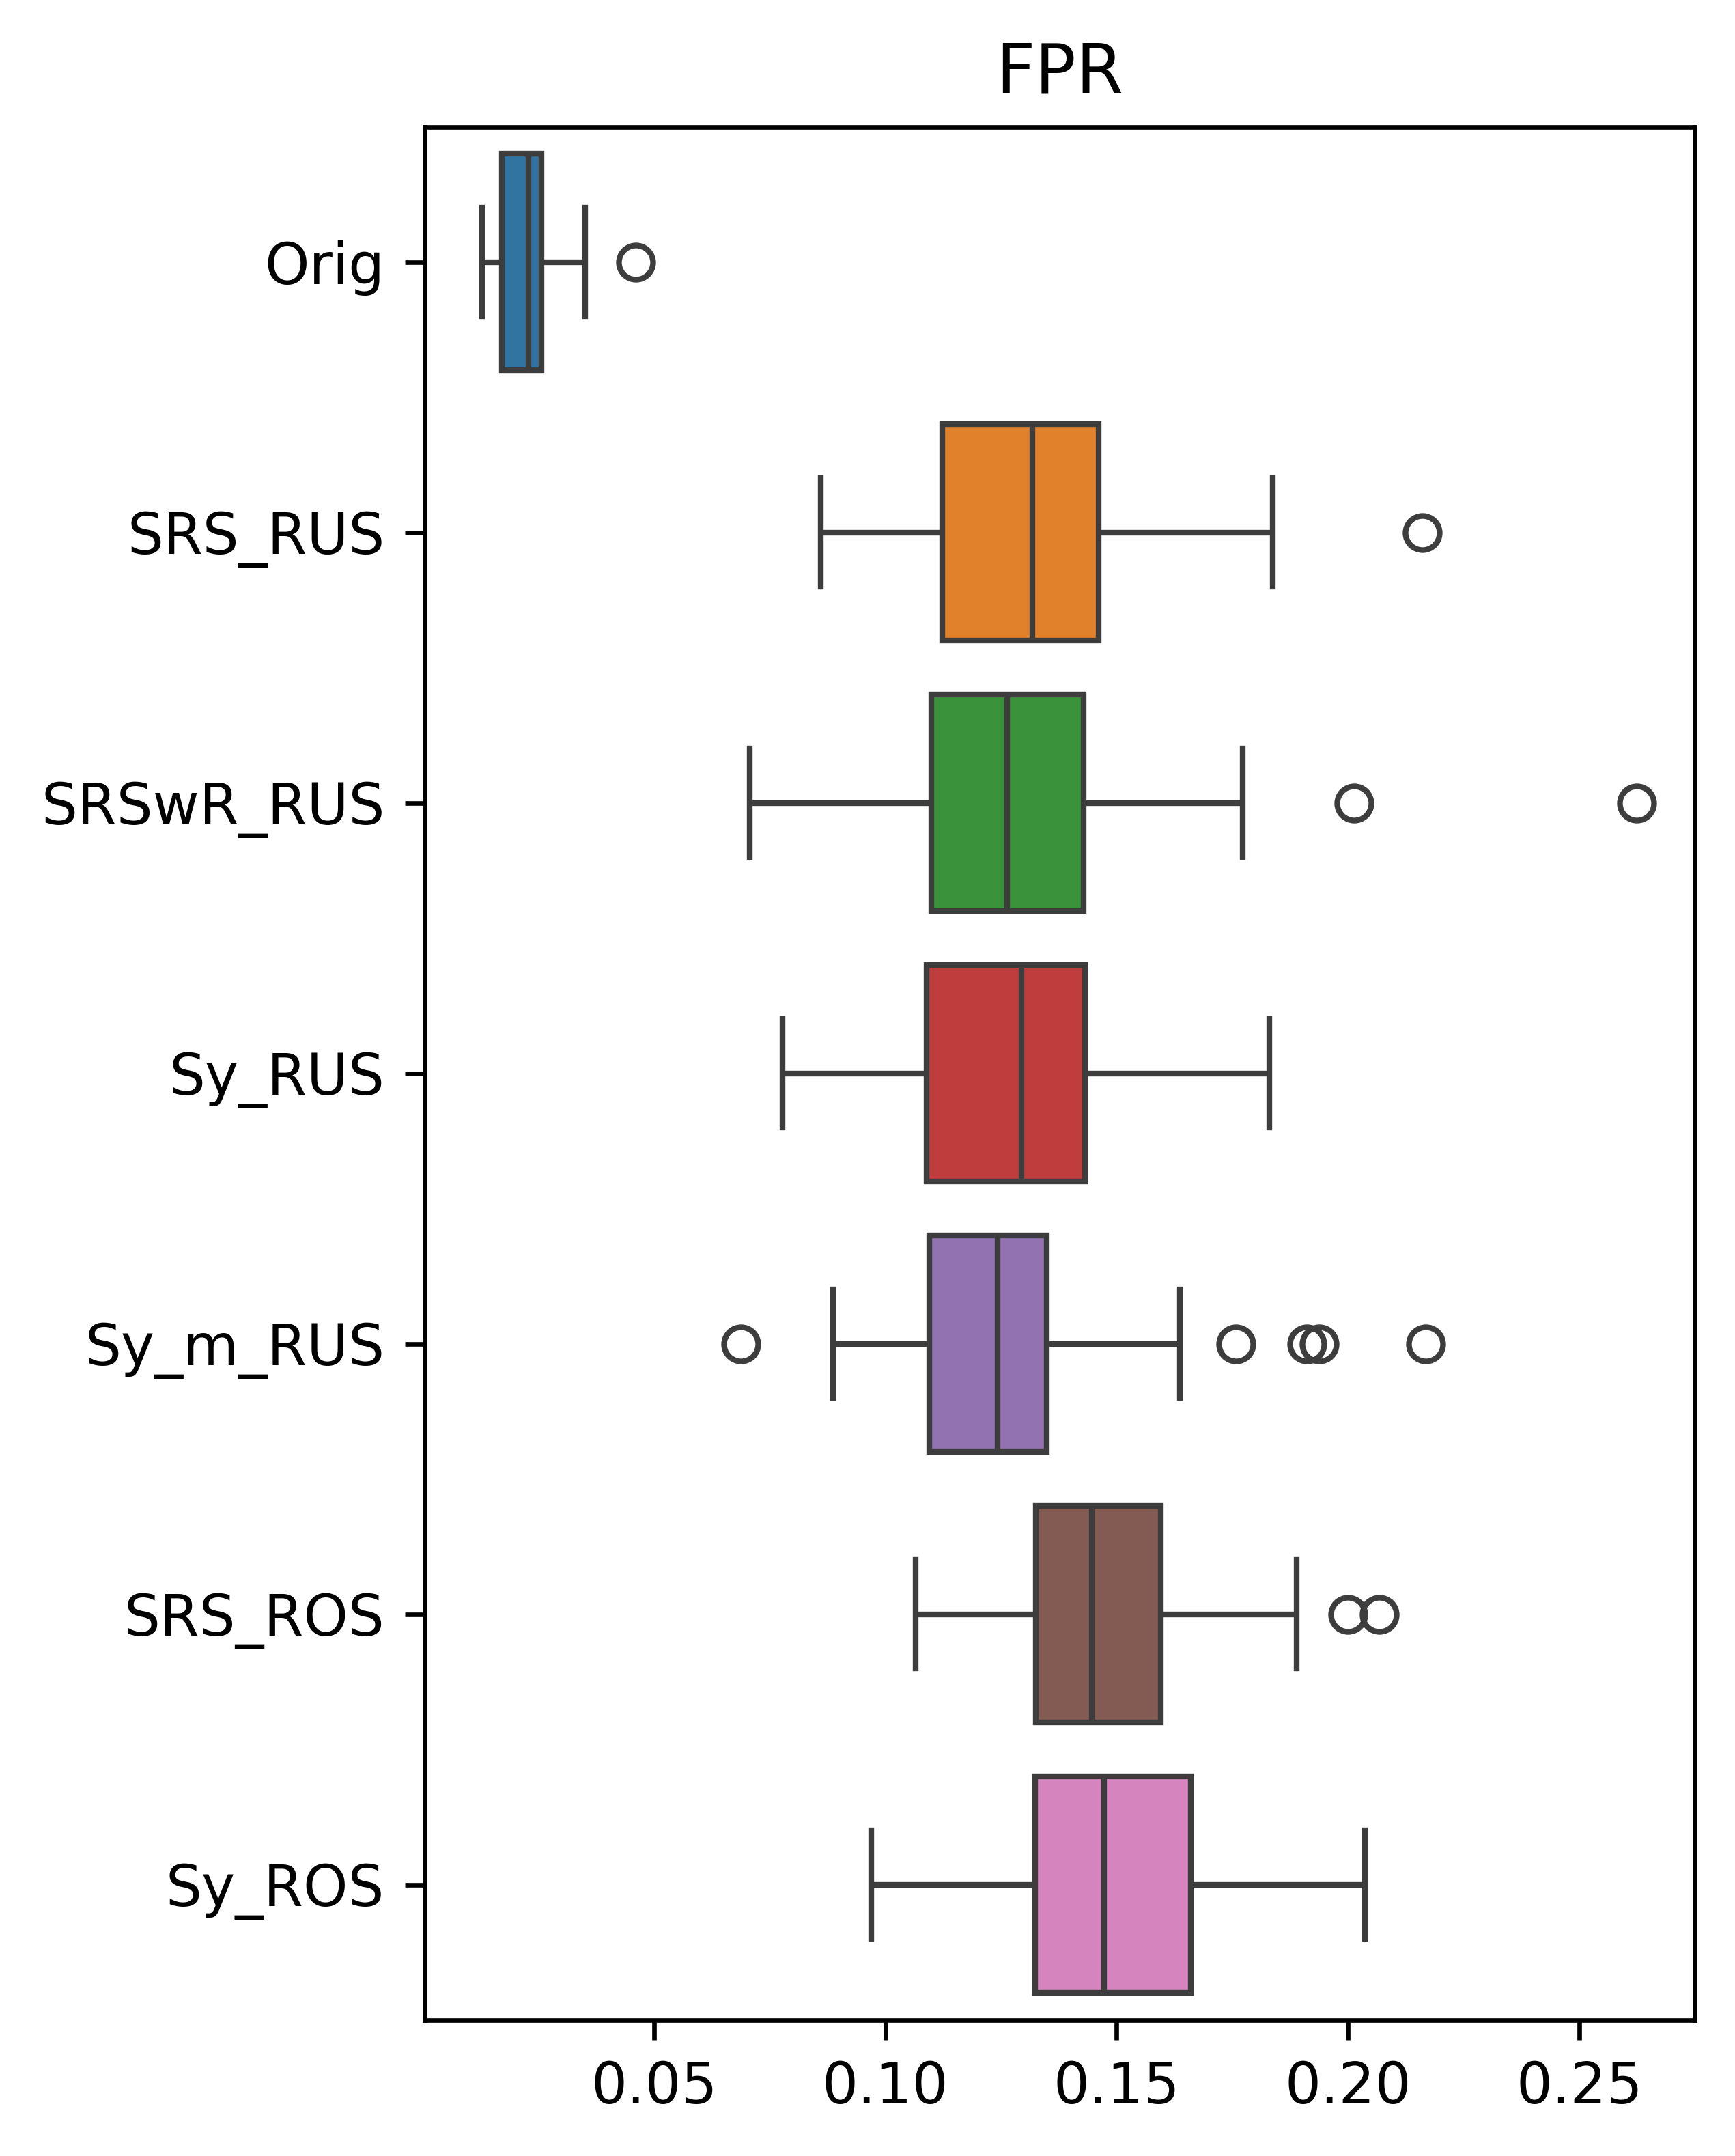

In [34]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [35]:
FNR = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_FNR
DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR

<Axes: title={'center': 'FNR'}>

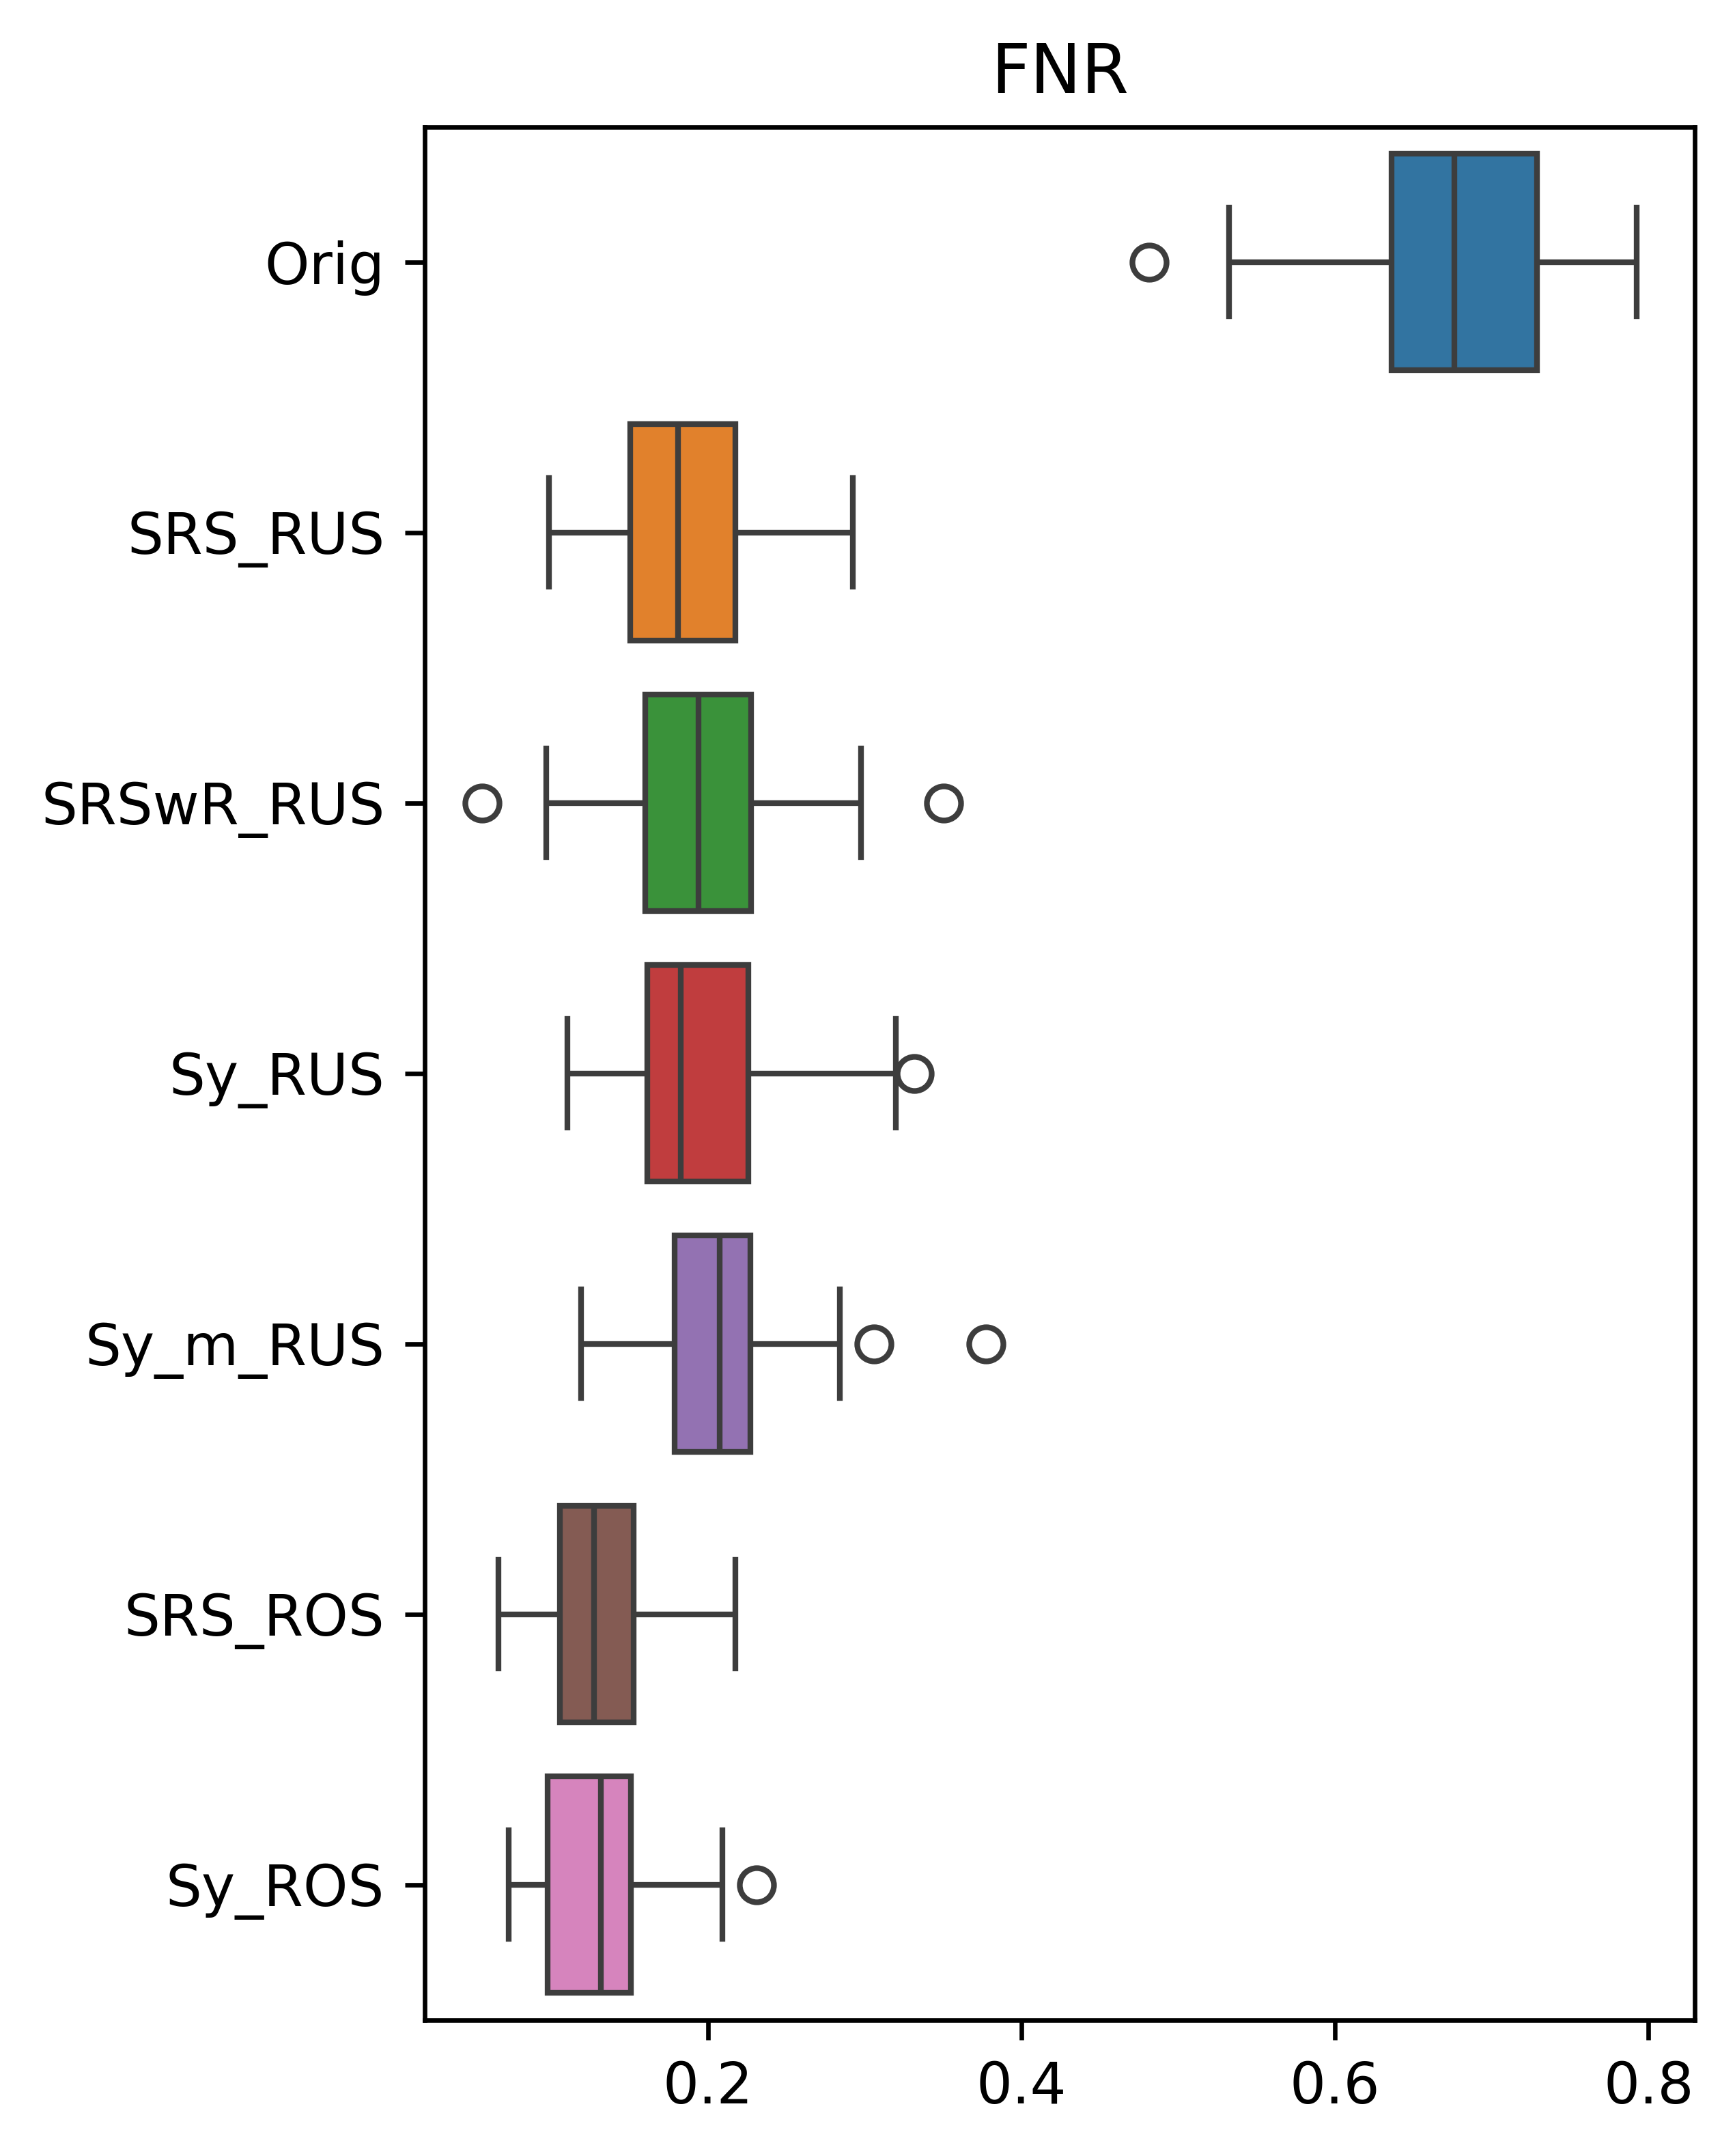

In [36]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [37]:
Time = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_time
DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time

<Axes: title={'center': 'Training Time'}>

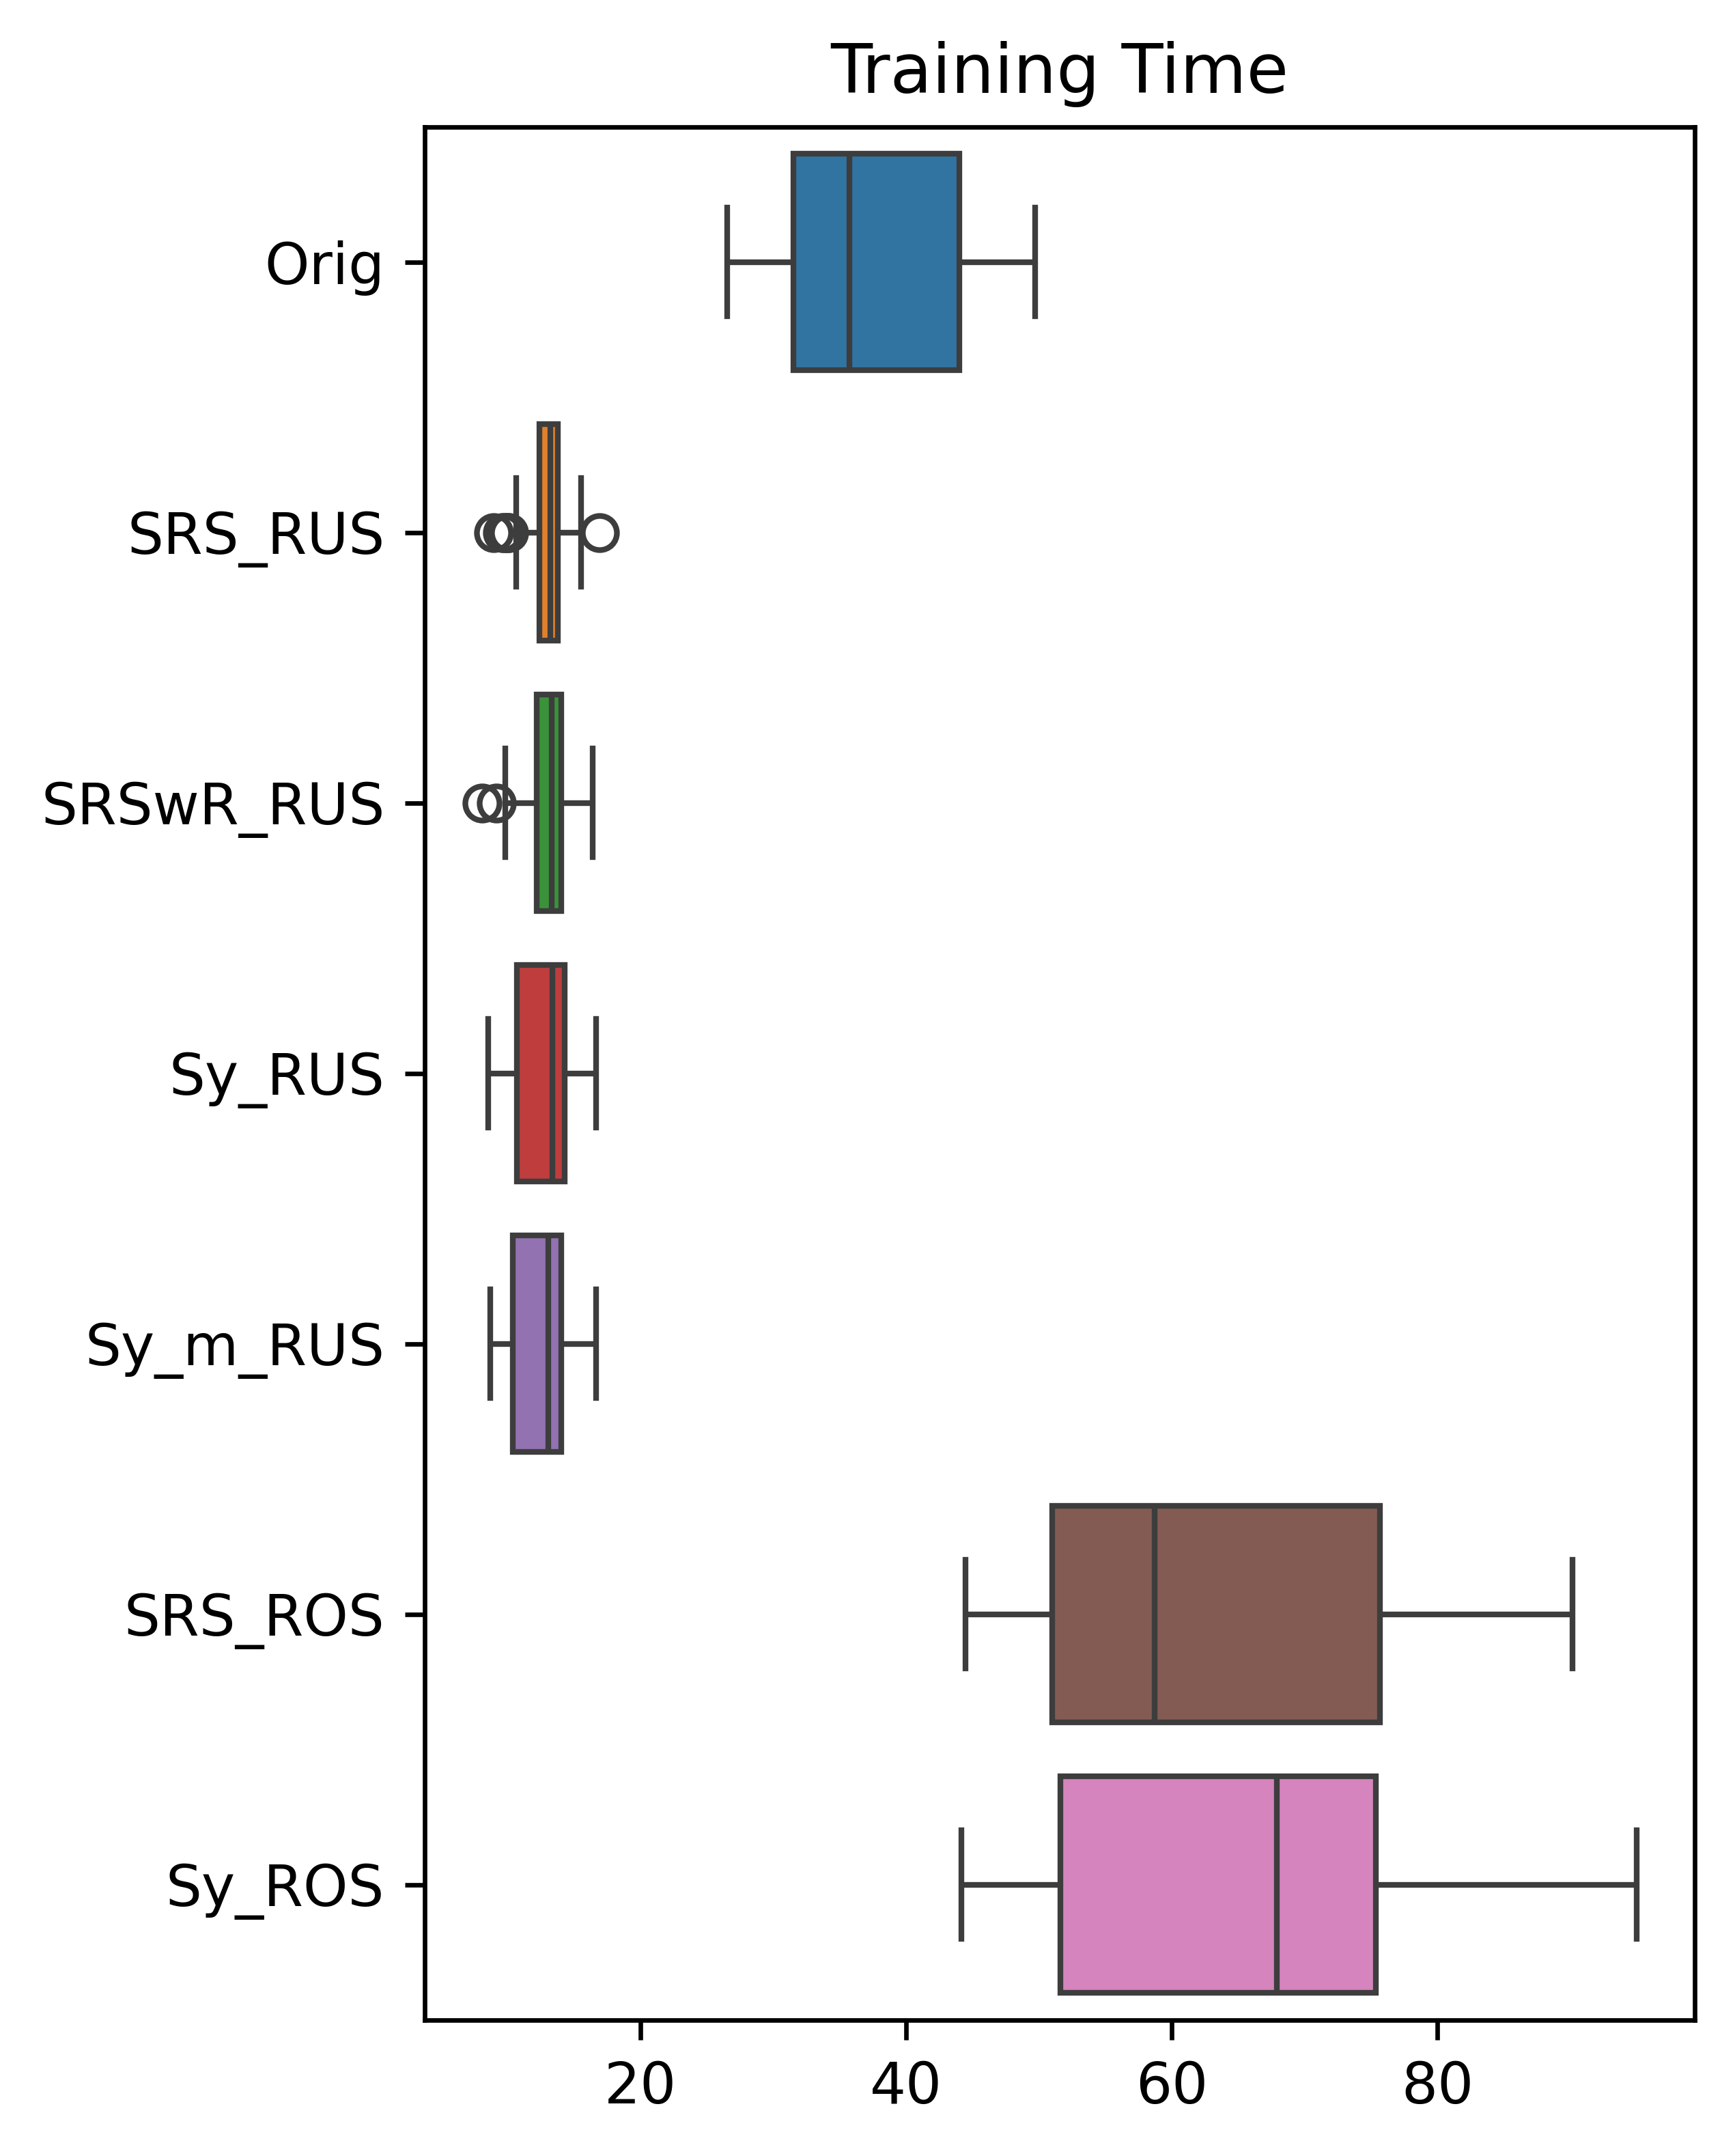

In [38]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')